# Crypto Portfolio Analysis
### Analyzes different cryptocurrency portfolio strategies using Python. Compares performance of various portfolio allocations across major cryptocurrencies like Bitcoin, Ethereum, and others.

### Top Cryptocurrencies (Excluding BTC, ETH & Stablecoins)
1. BNB (Binance Coin)
2. Solana (SOL)
3. XRP (Ripple)
4. Cardano (ADA)
5. Avalanche (AVAX)

### Top DeFi Tokens
1. Chainlink (LINK)
2. Uniswap (UNI)
3. Aave (AAVE)
4. Maker (MKR)
5. Curve (CRV)

### Top Meme Coins
1. Dogecoin (DOGE)
2. Shiba Inu (SHIB)
3. Pepe (PEPE)
4. FLOKI
5. Bonk (BONK)

### Overall Top 15
1. Bitcoin (BTC)
2. Ethereum (ETH)
3. Tether (USDT)
4. BNB (BNB)
5. Solana (SOL)
6. XRP (XRP)
7. USDC (USD Coin)
8. Cardano (ADA)
9. Avalanche (AVAX)
10. Dogecoin (DOGE)
11. TRON (TRX)
12. Chainlink (LINK)
13. Polkadot (DOT)
14. Polygon (MATIC)
15. Shiba Inu (SHIB)

### Setting the libraries

In [2]:
# Standard data manipulation and analysis
import pandas as pd

# Configure Plotly for notebook display
import plotly.io as pio
pio.templates.default = "plotly_white"  # Clean template
pio.renderers.default = "notebook"      # Ensure plots show in notebook

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [101]:
import pandas as pd
import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt

pd.options.plotting.backend = 'plotly'

### Getting Data

In [60]:
main_coins = ['BTC', 'ETH', 'BNB', 'SOL', 'XRP', 'ADA', 'AVAX', 'DOT']
defi_coins = ['LINK', 'UNI', 'AAVE', 'MKR', 'CRV']
meme_coins = ['DOGE', 'SHIB', 'PEPE', 'FLOKI', 'BONK']


start_date = '2021-01-01'
end_date   = '2025-01-20'

In [190]:
def get_data(ticker: list, start_date: str, end_date: str) -> pd.DataFrame:
    data = yf.download([coin + '-USD' for coin in ticker], start=start_date, end=end_date, interval='1d')['Close']
    data.columns = sorted(ticker)
    returns = data.pct_change().dropna().fillna(0)
    return returns

In [191]:
coins_returns = get_data(main_coins, start_date, end_date)
defi_returns = get_data(defi_coins, start_date, end_date)
meme_returns = get_data(meme_coins, start_date, end_date)

[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
/var/folders/9l/j_lcmk8d6fvgqx3f_ht60_yh0000gn/T/ipykernel_64167/835802102.py:4: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



In [192]:
returns = pd.concat([coins_returns, defi_returns, meme_returns], axis=1)

In [180]:
returns

,ADA,AVAX,BNB,BTC,DOT,ETH,SOL,XRP,AAVE,CRV,LINK,MKR,UNI,BONK,DOGE,FLOKI,PEPE,SHIB
Date,,,,,,,,,,,,,,,,,,
2021-01-02,0.012,-0.046,0.009,0.094,0.109,0.060,-0.023,-0.066,-0.051,-0.013,0.029,0.047,2.284,NaN,NaN,NaN,NaN,NaN
2021-01-03,0.155,-0.006,0.076,0.020,0.090,0.259,0.201,0.019,0.063,0.095,0.117,0.114,0.021,NaN,NaN,NaN,NaN,NaN
2021-01-04,0.096,0.034,-0.005,-0.025,-0.056,0.066,0.150,0.048,0.220,0.007,-0.006,0.006,-0.024,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.149,0.180,0.020,0.063,0.025,0.057,-0.132,-0.042,0.048,0.015,0.071,0.117,0.062,NaN,NaN,NaN,NaN,NaN
2021-01-06,0.285,0.090,0.010,0.083,0.041,0.097,-0.106,0.106,-0.012,0.062,0.180,0.343,-0.637,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-15,0.085,0.092,0.022,0.041,0.075,0.070,0.098,0.182,0.082,0.113,0.089,0.036,0.041,0.074,0.083,0.062,0.000,0.045
2025-01-16,0.010,0.005,-0.008,-0.007,-0.002,-0.041,0.026,0.029,-0.034,-0.029,0.040,-0.006,-0.005,-0.034,-0.023,-0.017,0.000,-0.043
2025-01-17,0.041,0.034,0.019,0.047,0.051,0.050,0.040,0.016,0.086,0.120,0.092,0.031,0.040,0.179,0.104,0.095,0.000,0.091


### Creating the Portfolios

* Heavy in BTC:  
    - 70% BTC | 30% Other (ETH, BNB, SOL, XRP, ADA, AVAX and DOT)  
* BTC & ETH:  
    - 50% BTC | 50% ETH
* Same weight:
    - BTC | ETH | BNB | SOL | XRP | ADA | AVAX | DOT
* DeFi Coins:
    - LINK | UNI | AAVE | MKR | CRV  
* Meme Coins:
    - DOGE | SHIB | PEPE | FLOKI | BONK

In [181]:
## --------------- ADA | AVAX | BNB | BTC | DOT | ETH | SOL | XRP --- AAVE | CRV | LINK | MKR | UNI --- BONK | DOGE | FLOKI | PEPE | SHIB --------------- ##
heavy_btc_weights = [0.04285, 0.04285, 0.04285, 0.7, 0.04285, 0.04285, 0.04285, 0.04285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
btc_eth_weights = [0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
equal_weights = [0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125 , 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
defi_weights = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0]
meme_weights = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2]

##### For the main coins

In [182]:
portfolio_names = ['Heavy BTC Portfolio', 'BTC & ETH Only Portfolio', 'All equal weights Portfolio', 'Defi Portfolio', 'Meme Coin Portfolio']
weights = [heavy_btc_weights,btc_eth_weights, equal_weights, defi_weights, meme_weights]

portfolios = pd.DataFrame({
  name: returns @ wght for name, wght in zip(portfolio_names, weights)
})


In [187]:
portfolios

,portfolio 1,portfolio 2,portfolio 3,portfolio 4,portfolio 5
Date,,,,,
2021-01-02,NaN,NaN,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-01-15,0.056,0.056,0.083,0.072,0.053
2025-01-16,-0.004,-0.024,0.001,-0.007,-0.024
2025-01-17,0.044,0.049,0.037,0.074,0.094


##### Merging them

In [188]:
portfolios_normalized = (1 + portfolios.iloc[1:]).cumprod()
portfolios_normalized.iloc[0] = 1

### Graphic view

In [189]:
(portfolios_normalized*100).plot(title='Portfolio Returns from Jan 1st to 23rd April 2021', 
                                  labels=dict(Date="Date", value="Price (USD)", variable="Porfolio"))

ValueError: zero-size array to reduction operation fmin which has no identity

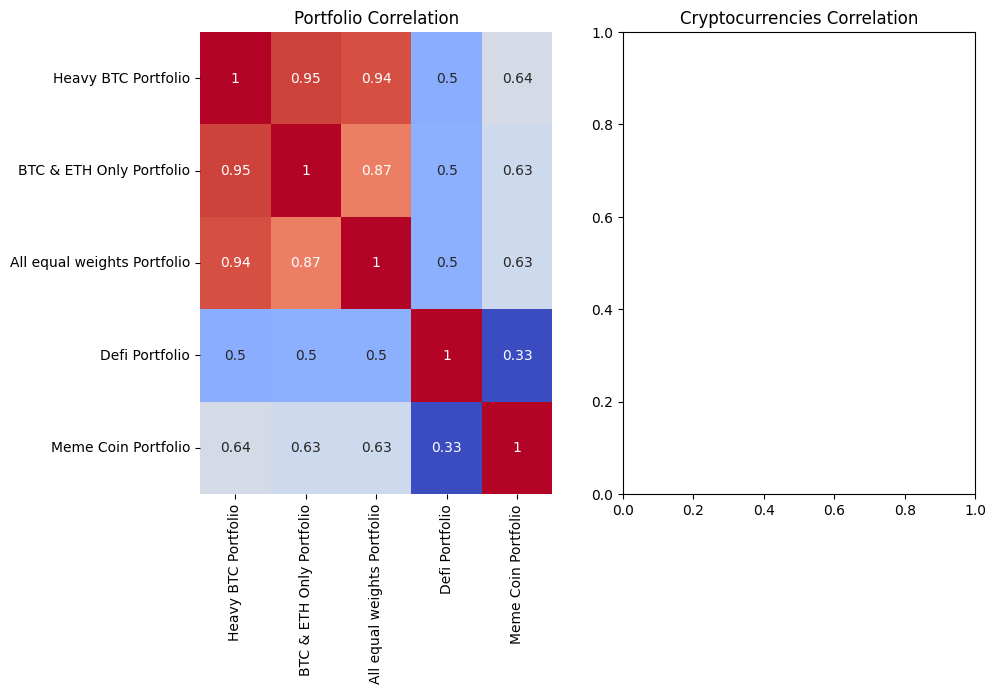

In [166]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))

ax1.set_title('Portfolio Correlation')
sns.heatmap(portfolios.corr().iloc[:6,:6], 
            annot=True, cmap='coolwarm', 
            ax=ax1, cbar=False);

ax2.set_title('Cryptocurrencies Correlation')
sns.heatmap(portfolios.corr().iloc[6:,6:], 
            annot=True, cmap='coolwarm',
            cbar=False, ax=ax2);


In [66]:
# sns.pairplot(portfolios.iloc[:, 4:]);

### Summary of the Results

In [103]:
results = pd.DataFrame(index=['Total Return', 'Volatility'], columns=portfolios.columns)
results.loc['Volatility']  = portfolios.std()*252**0.5
results.loc['Total Return'] = portfolios_normalized.iloc[-1] - 1

In [104]:
results.applymap(lambda x: f'{x:.1%}')

/var/folders/9l/j_lcmk8d6fvgqx3f_ht60_yh0000gn/T/ipykernel_64167/2237101436.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,Heavy BTC Portfolio,BTC & ETH Only Portfolio,All equal weights Portfolio,ADA,AVAX,BNB,BTC,DOT,ETH,SOL,XRP
Total Return,502.2%,301.6%,1510.6%,458.7%,917.9%,1683.9%,214.7%,-32.3%,314.3%,13827.1%,1233.0%
Volatility,53.6%,55.9%,65.1%,80.3%,104.4%,74.7%,51.3%,84.6%,66.1%,99.4%,89.7%
